####  **Professor:  $\;\;\;$Hong Hyung-Woo** 
####  **Student NB: $\;\;\;\;\;\;\;\;\;\;\;$ 20166450** 
####  **Major:           $\;\;\;$ Software Engineering**
####  **Name:         $\;\;\;\;\;\;\;\;\;\;\;$   Kim Young Min**



[Polynomial fitting]

Solve a least square problem to find an optimal polynomial curve for a given set of two dimensional points.

Demonstrate the effect of the degree of polynomial in fitting a given set of points.

- choose a polynomial curve and generate points along the curve with random noise

- plot the generated noisy points along with its original polynomial without noise

- plot the approximating polynomial curve obtained by solving a least square problem

- plot the approximating polynomial curve with varying polynomial degree

### Start!

In [2]:
import matplotlib.pyplot as plt
from random import *
import numpy as np
from numpy.linalg import inv

%matplotlib inline

import pylab as pl


## choose a polynomial curve and generate points along the curve with random noise
## plot the generated noisy points along with its original polynomial without noise

#### I chose random noise points from 'Sin(x) curve' 

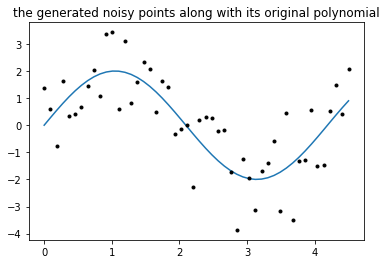

In [3]:
def f(size):
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5)
    return (x,y)

def sample(size):
    x = np.linspace(0, 4.5, size)
    y = 2 * np.sin(x * 1.5) + pl.randn(x.size)
    return (x,y)

pl.clf()
f_x, f_y = f(50)
pl.plot(f_x, f_y)
x, y = sample(50)
pl.title("the generated noisy points along with its original polynomial")
pl.plot(x, y, 'k.')


### Define Functions: pseudo_inverse(using matrix) and least_square_energy(using L2-Norm)

In [4]:
def pseudo_inverse(x,order,y):
    A=np.array([[0.0]*(order+1)]*50)

    for j in range(50):
        for i in range(order+1):
            A[j][order-i]=x[j]**i

    Apinv = inv(A.T @ A) @ (A.T@y)
    
    def polynominal_func(x):
        polynominal=0.0
        for i in range(order+1):
            polynominal+=Apinv[order-i]*(x**i)
        return polynominal

    plt.xlim(0,4.5)
    plt.ylim(-4,5)
    plt.grid()
    plt.plot(x,polynominal_func(x))
    plt.plot(x, y, 'k.')
    return polynominal_func(x)
        
def least_square_ener(polynominal_list,y):
        d = (polynominal_list - y) ** 2
        s = np.sum(d)
        return s
        
    

##### This is list for Least Square Energy.

In [5]:
ener_list=np.array([])

## Plot the approximating polynomial curve obtained by solving a least square problem.

#### When Polynominal Order =1.

[111.88781839]


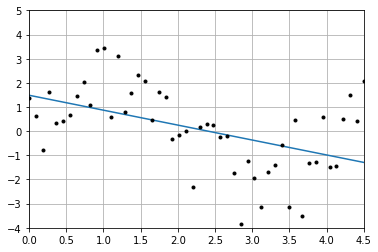

In [6]:
order1=1

polynominal_list1=pseudo_inverse(x,order1,y)

ener_list=np.array([])
ener_list=np.append(ener_list,least_square_ener(polynominal_list1,y))
print(ener_list)

#### When Polynominal Order =2.

[111.88781839 106.80218766]


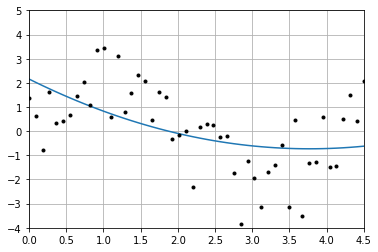

In [7]:
order2=2

polynominal_list2=pseudo_inverse(x,order2,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list2,y))
print(ener_list)

#### When Polynominal Order =3.

[111.88781839 106.80218766  55.03810589]


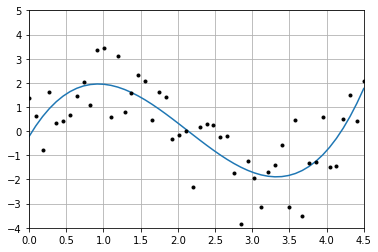

In [8]:
order3=3

polynominal_list3=pseudo_inverse(x,order3,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list3,y))
print(ener_list)

#### When Polynominal Order =5.

[111.88781839 106.80218766  55.03810589  52.87009273]


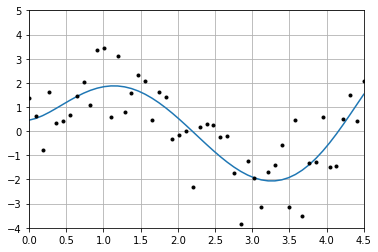

In [9]:
order5=5

polynominal_list5=pseudo_inverse(x,order5,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list5,y))
print(ener_list)


#### When Polynominal Order =8.

[111.88781839 106.80218766  55.03810589  52.87009273  49.50272747]


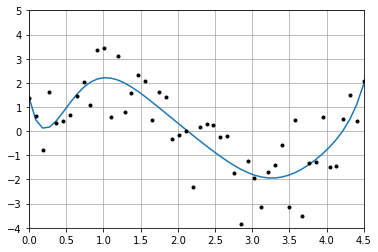

In [10]:
order8=8

polynominal_list8=pseudo_inverse(x,order8,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list8,y))
print(ener_list)

#### When Polynominal Order =10.

[111.88781839 106.80218766  55.03810589  52.87009273  49.50272747
  49.13111566]


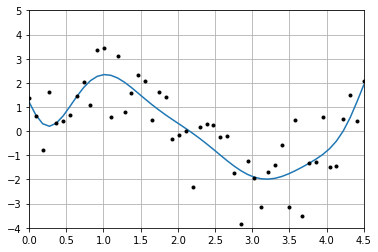

In [11]:
order10=10

polynominal_list10=pseudo_inverse(x,order10,y)

ener_list=np.append(ener_list,least_square_ener(polynominal_list10,y))
print(ener_list)


#### When Polynominal Order =11.

[111.88781839 106.80218766  55.03810589  52.87009273  49.50272747
  49.13111566  48.65682403]


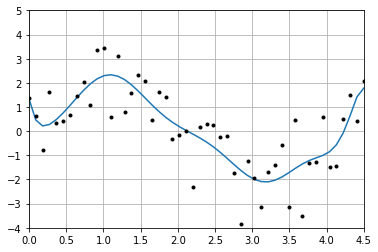

In [12]:
order11=11

polynominal_list11=pseudo_inverse(x,order11,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list11,y))
print(ener_list)


#### When Polynominal Order =15.

[111.88781839 106.80218766  55.03810589  52.87009273  49.50272747
  49.13111566  48.65682403  49.7206402 ]


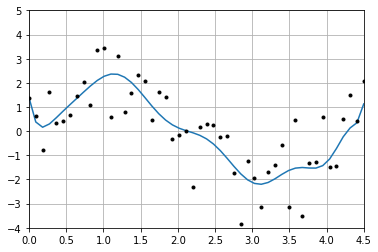

In [13]:
order15=15

polynominal_list15=pseudo_inverse(x,order15,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list15,y))
print(ener_list)


#### When Polynominal Order =25.

[111.88781839 106.80218766  55.03810589  52.87009273  49.50272747
  49.13111566  48.65682403  49.7206402   48.59835329]


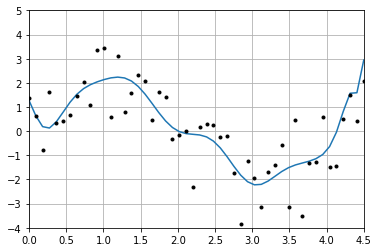

In [14]:
order25=25

polynominal_list25=pseudo_inverse(x,order25,y)
ener_list=np.append(ener_list,least_square_ener(polynominal_list25,y))
print(ener_list)

## Plot the approximating polynomial curve with varying polynomial degree.

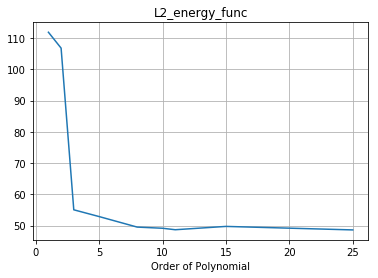

In [16]:
x_ener=[1,2,3,5,8,10,11,15,25]
plt.title("L2_energy_func")
plt.grid()
plt.xlabel("Order of Polynomial")
plt.plot(x_ener,ener_list)
